# Title: ***Outlier Detection using ISOLATION FOREST on APPLE and TESLA VOLUME Data***
## Group Member<br>
Muhammad Shoaib,   (iq50ywow) 23100849<br>
Moeen Haider,      (oh21araz) 23080927<br>
Aravind Ryali,     (an72etec) 23072348<br>
Dhaleema Davis,    (ep29ynyv) 23236396<br>
Ajharali Shaikh,   (uj49imyd) 23072460<br>

In [1]:
import sys
sys.path.append('../')

from IPython.display import display
from src.finance_ml.data_preparation.data_preparation import DataLoader
from src.finance_ml.Outlier_Detection_using_Isolation_forest.isolation_forest_AAPL_TSLA import OutlierDetector, load_and_prepare_data

In [2]:
import matplotlib.pyplot as plt

In [3]:
#Defining time_index_col (must be the same column in all inputs) and keep_cols refering to the columns that will remain in the dataset
dataloader = DataLoader(time_index_col='DATE', 
                        keep_cols=['VOLUME', 'OPEN', 'HIGHT', 'LOW', 'CLOSE', 'VW', 'TRANSACTIONS'])

# For AAPL

In [4]:
# File paths...
file_aapl = 'equities/AAPL_2020-04-07_2022-04-06.parquet'
file_path1 = '../data/' + file_aapl

In [5]:
# Loading and preparing data using the function
df_aapl = load_and_prepare_data(file_path1, dataloader, 'AAPL', 20000)
display(df_aapl)

,AAPL_VOLUME,AAPL_OPEN,AAPL_HIGHT,AAPL_LOW,AAPL_CLOSE,AAPL_VW,AAPL_TRANSACTIONS
DATE,,,,,,,
2020-04-07 12:17:00,14256.0,67.3500,67.3625,67.3275,67.3375,67.3454,45
2020-04-07 12:18:00,16552.0,67.3501,67.3625,67.3250,67.3250,67.3407,57
2020-04-07 12:19:00,80172.0,67.3250,67.4475,67.3250,67.4225,67.3937,149
2020-04-07 12:20:00,183740.0,67.4475,67.4700,67.3125,67.3700,67.3671,159
2020-04-07 12:21:00,35372.0,67.3500,67.3850,67.2975,67.2975,67.3469,102
...,...,...,...,...,...,...,...
2020-05-14 19:31:00,484740.0,76.9775,76.9850,76.8825,76.9125,76.9240,1015
2020-05-14 19:32:00,320956.0,76.9100,76.9700,76.9063,76.9425,76.9390,824
2020-05-14 19:33:00,246284.0,76.9425,76.9950,76.9000,76.9050,76.9438,714


In [6]:
# Creating an instance of the OutlierDetector class
outlier_detector = OutlierDetector(0.02)

In [7]:
# Fit and predict outliers
data_outliers = outlier_detector.fit_predict(df_aapl, 'AAPL_VOLUME')

### Visualization

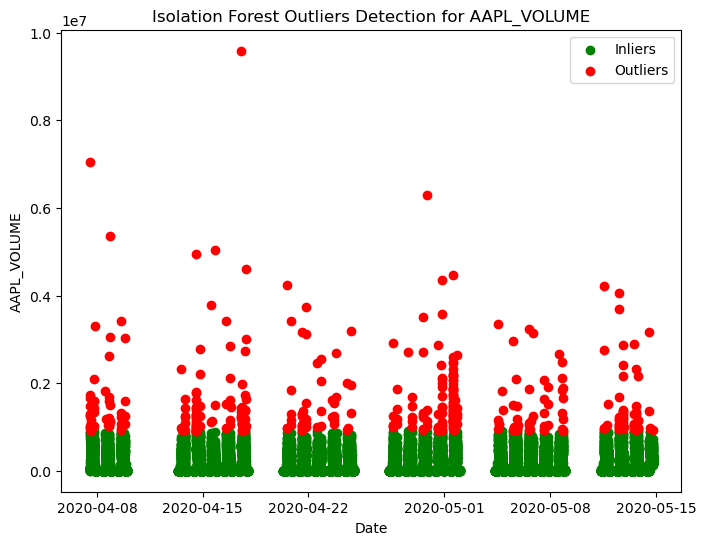

In [8]:
# Visualize outliers
outlier_detector.visualize_outliers(data_outliers, 'AAPL_VOLUME')

### Remove outliers from AAPL_COLUMN

In [9]:
# Remove outliers
data_inliers = outlier_detector.remove_outliers(data_outliers)

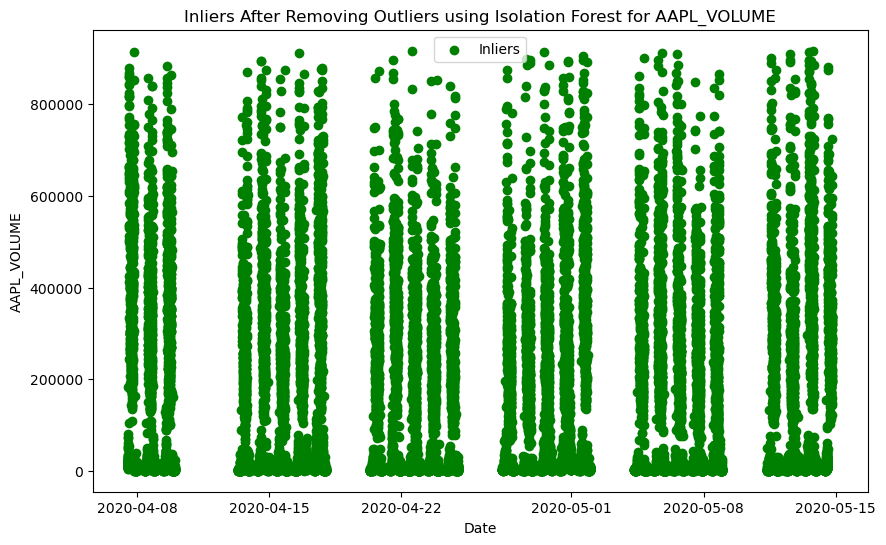

In [10]:
# Visualize inliers after removing outliers
plt.figure(figsize=(10, 6))
plt.scatter(data_inliers.index, data_inliers['AAPL_VOLUME'], c='green', label='Inliers')
plt.title('Inliers After Removing Outliers using Isolation Forest for AAPL_VOLUME')
plt.xlabel('Date')
plt.ylabel('AAPL_VOLUME')
plt.legend()
plt.show()

# For TSLA

In [11]:
file_tsla = 'equities/TSLA_2020-04-07_2022-04-06.parquet'
file_path2 = '../data/' + file_tsla

In [12]:
df_tsla = load_and_prepare_data(file_path2, dataloader, 'TSLA', 20000)
display(df_tsla)

,TSLA_VOLUME,TSLA_OPEN,TSLA_HIGHT,TSLA_LOW,TSLA_CLOSE,TSLA_VW,TSLA_TRANSACTIONS
DATE,,,,,,,
2020-04-07 12:44:00,12730.0,107.8200,108.022,107.8000,108.0220,107.9410,62
2020-04-07 12:45:00,2660.0,108.1000,108.100,108.1000,108.1000,108.1064,32
2020-04-07 12:46:00,25895.0,108.1200,108.200,108.0600,108.1000,108.1376,79
2020-04-07 12:47:00,4750.0,108.0020,108.160,108.0000,108.1600,108.0972,42
2020-04-07 12:48:00,9385.0,108.1980,108.200,108.1520,108.2000,108.1773,56
...,...,...,...,...,...,...,...
2020-05-18 17:38:00,59150.0,162.4398,162.488,162.3991,162.4240,162.4504,284
2020-05-18 17:39:00,58700.0,162.4260,162.496,162.3020,162.3100,162.4195,303
2020-05-18 17:40:00,37175.0,162.3680,162.368,162.2888,162.3350,162.3237,194


In [13]:
outlier_detector = OutlierDetector(contamination=0.02)

In [14]:
# Fit and predict outliers
data_outliers = outlier_detector.fit_predict(df_tsla, 'TSLA_VOLUME')

### Visualization

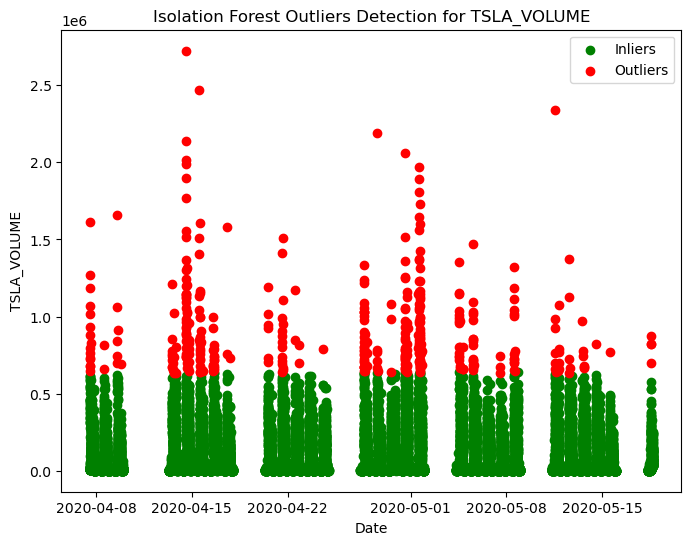

In [15]:
# Visualize outliers
outlier_detector.visualize_outliers(data_outliers, 'TSLA_VOLUME')

### Remove Outliers from TESLA

In [16]:
data_inliers = outlier_detector.remove_outliers(data_outliers)

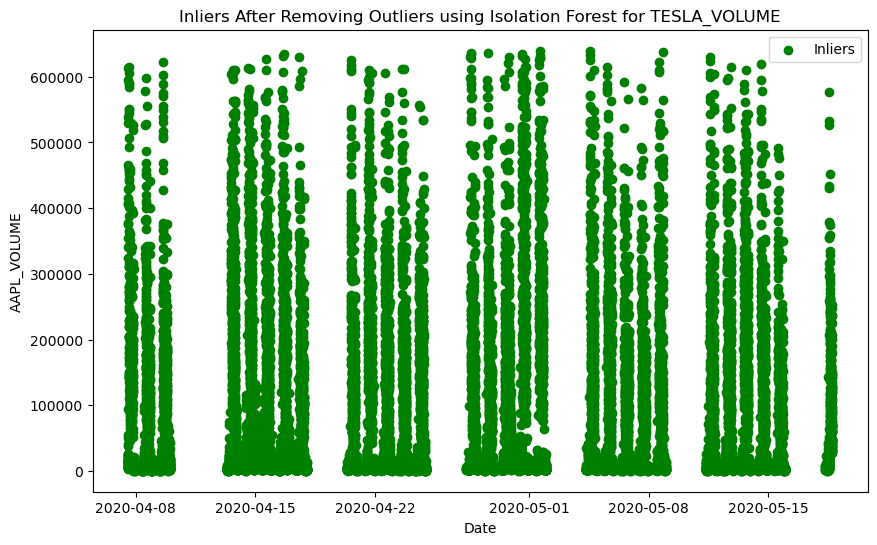

In [17]:
# Visualize inliers after removing outliers
plt.figure(figsize=(10, 6))
plt.scatter(data_inliers.index, data_inliers['TSLA_VOLUME'], c='green', label='Inliers')
plt.title('Inliers After Removing Outliers using Isolation Forest for TESLA_VOLUME')
plt.xlabel('Date')
plt.ylabel('AAPL_VOLUME')
plt.legend()
plt.show()